##**THE SPARKS FOUNDATION** 
### TASK 6 - Prediction using Decision Tree Algorithm (Level - Intermediate))
* Create the Decision Tree classifier and visualize it graphically.
* The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.
* Dataset : https://bit.ly/3kXTdox

\


####**Author: Urmi Sen** 
Data Science & Business Analytics Intern \
Website: https://urmisen.github.io/website/ \
Linkedin: https://www.linkedin.com/in/urmi-sen-78a821149/ \
Email: urmisen1202@gmail.com

### Importing necessary libraries

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier              # Defining the decision tree algorithm
from sklearn import tree
from sklearn.metrics import roc_curve, auc

Loading the dataset

In [2]:
!git clone https://github.com/urmisen/Sparks_Foundation_Task

Cloning into 'Sparks_Foundation_Task'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [3]:
# Reading the Data 
df = pd.read_csv('/content/Sparks_Foundation_Task/Task_6_Decision_Tree/IRIS.csv')
iris = df.copy()

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

### **Checking Data's Information ; Type**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The dataset contains 150 rows of records and 4 columns of attributes and a target column. The data types of the attributes are quantitative continuous numerical float type.

The memory space usage is at least 6.0+ Kilobytes (KB).

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### **Checking the null values :**

In [8]:
# Checking the training data dose it has any null value or not
df.isnull().any().describe()

count         5
unique        1
top       False
freq          5
dtype: object

As here unique == 1 , thus the dataset is an unique dataset and doesn't exist anynull value in the Dataset so, we can now visualize our Data.

### **Checking the null values :**

In [9]:
# Checking the training data dose it has any null value or not
df.isnull().any().describe()

count         5
unique        1
top       False
freq          5
dtype: object

As here unique == 1 , thus the dataset is unique and here is no null value in the Dataset so, we can now visualize our Data.

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

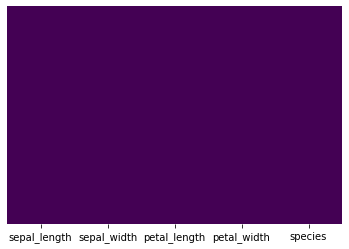

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### **Exploratory Data Analysis**

#### Univariate Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


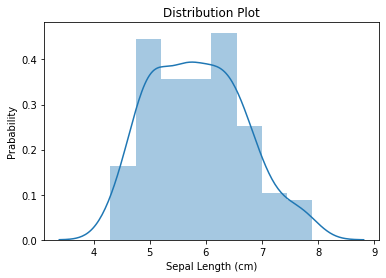

In [12]:
sns.distplot(df['sepal_length'])
plt.title('Distribution Plot')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Prabability') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


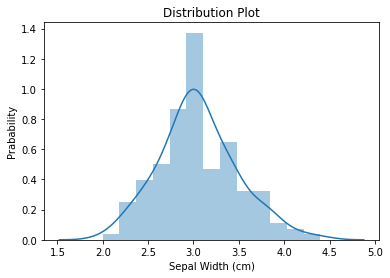

In [13]:
sns.distplot(df['sepal_width'])
plt.title('Distribution Plot')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Prabability') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


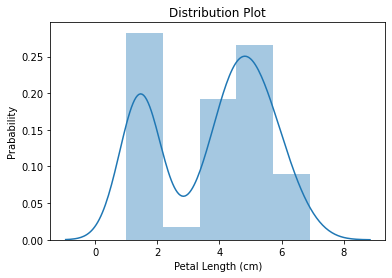

In [14]:
sns.distplot(df['petal_length'])
plt.title('Distribution Plot')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Prabability') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


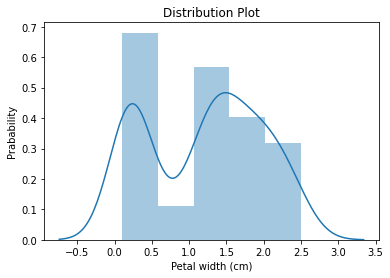

In [15]:
sns.distplot(df['petal_width'])
plt.title('Distribution Plot')
plt.xlabel('Petal width (cm)')
plt.ylabel('Prabability') 
plt.show()

#### **Multivariate Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


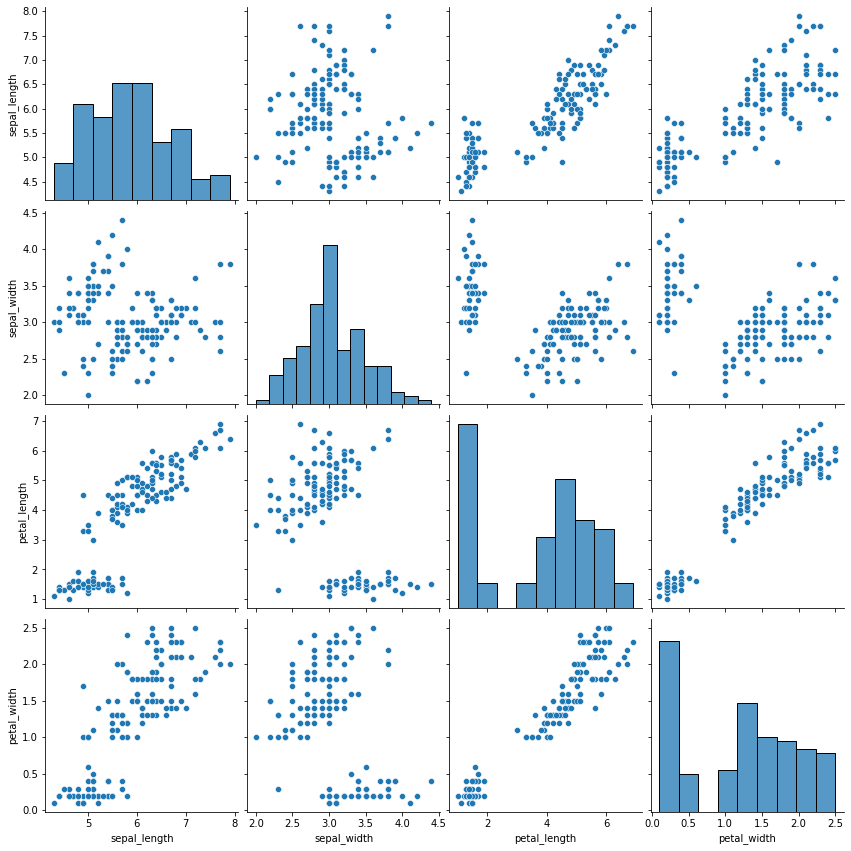

In [16]:
sns.pairplot(df,size=3)

From the pairplot , it can be visually observed that there can be atleast 2 different clusters and It can be seen that one species Iris-setosa has different attributes from the other 2 species Iris-versicolor and Iris-virginica.

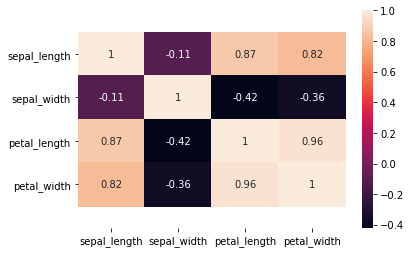

In [17]:
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

1. Positive correlation exist between-
* sepal length	and	petal length (0.87)	
* sepal length	and petal width (0.82)
* petal length	and petal width (0.96)

\

2. Negative correlation exist between-
* sepal length	and sepal width (- 0.11)
* petal length	and sepal width (- 0.42)
* petal width	and sepal width (- 0.36)



### **Preparing the data**

In [18]:
target = list(df['species'])
data = df.drop(['species'],axis=1)

In [19]:
Target=[]
for i in target:
  if(i=='Iris-setosa'):
    cls=0
  elif(i=='Iris-versicolor'):
    cls=1
  else:
    cls=2
  Target.append(cls)

Target=np.array(Target)



In [20]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [21]:
print(Target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### **Checking For Duplicate data**

In [22]:
data.duplicated().sum()

3

In [23]:
#dropping the duplicate data
data.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
data.reset_index(inplace=True)

In [25]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test =train_test_split(data, target, test_size=0.33, random_state=0)

### **Fitting the model**

In [26]:
model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### **Prediction**

In [27]:
y_pred = model.predict(X_test)

In [28]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 100.00
|   |--- feature_3 <= 2.35
|   |   |--- class: Iris-setosa
|   |--- feature_3 >  2.35
|   |   |--- class: Iris-versicolor
|--- feature_0 >  100.00
|   |--- class: Iris-virginica



#### **Model Evaluation**

In [29]:
model.score(X_test,y_test)

0.98

In [30]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y_test,y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Report : ')
print (classification_report(y_test,y_pred))

Confusion Matrix :
[[16  0  0]
 [ 0 19  0]
 [ 0  1 14]]
Accuracy Score : 0.98
Report : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



[Text(558.0, 943.75, 'sepal_length <= 100.0\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = Iris-virginica'),
 Text(372.0, 566.25, 'petal_width <= 2.35\ngini = 0.499\nsamples = 65\nvalue = [34, 31, 0]\nclass = Iris-setosa'),
 Text(186.0, 188.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(558.0, 188.75, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = Iris-versicolor'),
 Text(744.0, 566.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = Iris-virginica')]

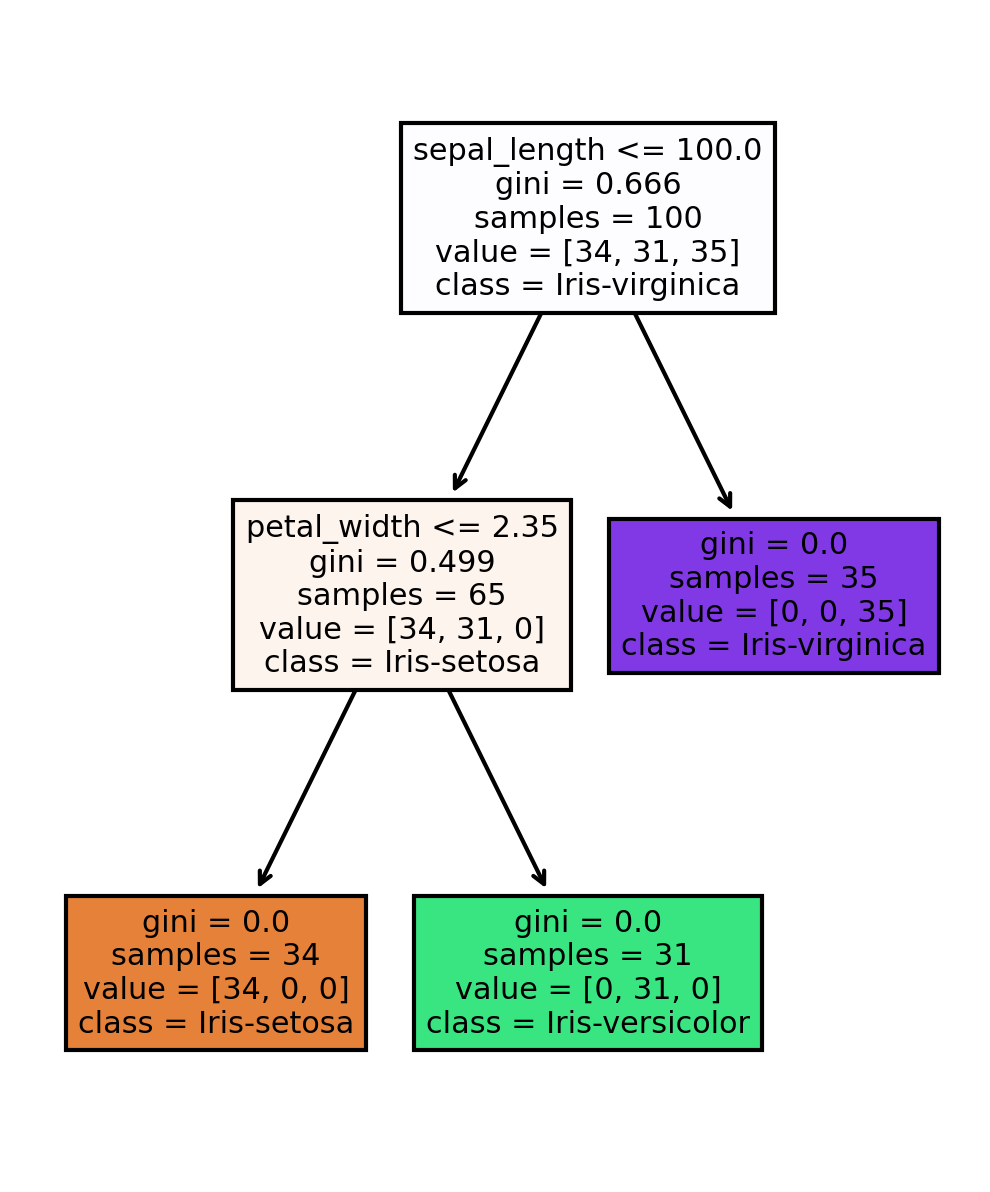

In [31]:
# Plotting the decision tree
feature_names=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
target_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
fig ,axes= plt.subplots(nrows=1, ncols=1, figsize = (4, 5), dpi=300)
tree.plot_tree(model,
                  feature_names = feature_names,
                  class_names = target_names,
                  filled = True)

### **Conclusion**

In the case study, it has been observed that the model can predict the right class accordingly for new or test data with almost 98%. Out of 50 test observation we have correctly identified 49, so we can say that it is a good model for the prediction of the class based on the four parameters.

# **THANK YOU ...!  :)**